# MC Validation
* ## Problem: 
    * ### Current MC validation lacks quantitative comparison to data
    * ### Good MC - data corresponance crucial for success of data analysis
* ## Solution:
    * ### Correlate MC and data, treating them as two different sources 

## 1. Load macro and initialize with selected MC and data set
### PbPb 5TeV: Hijing min-bias vs data

In [1]:
// This macro is currently hosted in the TPC offline git,
// we'll integrate it into AliRoot asap
gROOT->LoadMacro("tpcMCValidationStandardQA.C+");

In [2]:
 InitTPCMCValidation("LHC15k1a1","passMC","LHC15o", "pass3_lowIR_pidfix",0,0);

I-AliExternalInfo::SetupVariables: Information will be stored/retrieved in/from ./sim/2015/LHC15k1a1/passMC/
I-AliExternalInfo::IsDownloadNeeded: -- File is 11240 s old; NOT older than the set timelimit 86400 s
I-AliExternalInfo::BuildIndex: TreeName:trending;IndexName:run
I-qatpcAddMetadata: Start processing Tree trending
I-qatpcAddMetadata: End
I-AliExternalInfo::SetupVariables: Information will be stored/retrieved in/from ./sim/2015/LHC15k1a1/passMC/
I-AliExternalInfo::IsDownloadNeeded: -- File is 11240 s old; NOT older than the set timelimit 86400 s
I-AliExternalInfo::BuildIndex: TreeName:trending;IndexName:run
I-ACLiC: unmodified script has already been compiled and loaded
I-qatpcAddMetadata: Start processing Tree trending
I-qatpcAddMetadata: End
I-AliExternalInfo::GetTree: AddFriend QA.TPC+QA.TPC - entries=11
I-AliExternalInfo::SetupVariables: Information will be stored/retrieved in/from ./sim/2015/LHC15k1a1/passMC/
I-AliExternalInfo::IsDownloadNeeded: -- File is 11234 s old; NOT

sh: 1: cd: can't cd to /misc/alisoft/alibuild/sw/ubuntu1404_x86-64/AliRoot/SwanR60707-ARm-APm-1/../src


I-TCanvas::MakeDefCanvas:  created default TCanvas with name c1
number of graph entries: 11
sStatusbarVars = ncl;dcarResol;itsEffStatus;
sCriteria      = (1):(statisticOK):(varname_Warning):(varname_Outlier):(varname_PhysAcc)


sh: 1: cd: can't cd to /misc/alisoft/alibuild/sw/ubuntu1404_x86-64/AliPhysics/SwanR60707-ARm-APm-1/../src


## 2. Specify legend ranges, declare graph
#### This tutorial is hot off the needle, will hide such standard procedures from end-user 

In [3]:
 Double_t cRange[4]={0.13,0.01,0.5,0.35};
  Double_t cRange2[4]={0.13,0.01,0.5,0.3};
  Double_t cRange5[4]={0.13,0.01,0.8,0.3};
  TMultiGraph *graph=0,*lines=0;

# MC - data comparison: Number of TPC clusters

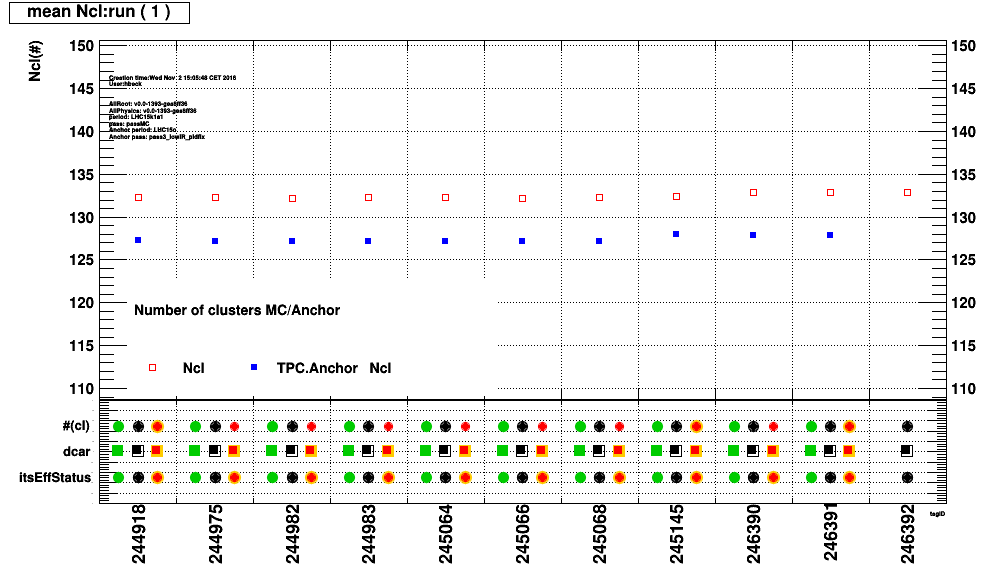

I-TCanvas::Print: png file meanTPCNclMCtoAnchor.png has been created


In [4]:
{ //Number of clusters comparison MC/real data
    trendingDraw->fWorkingCanvas->Clear();  
    TLegend *legend2 = new TLegend(cRange2[0],cRange2[1],cRange2[2],cRange2[3],"Number of clusters MC/Anchor"); legend2->SetBorderSize(0);
    legend2->SetNColumns(2);
    graph = TStatToolkit::MakeMultGraph(treeMC,"","meanTPCncl;TPC.Anchor.meanTPCncl:run","1","25;21","2;4",1,0.75,5,legend2);
    TStatToolkit::DrawMultiGraph(graph,"alp");
    legend2->Draw();
    trendingDraw->AppendStatusPad(0.3, 0.4, 0.05);
    trendingDraw->fWorkingCanvas->SaveAs("meanTPCNclMCtoAnchor.png"); 
  }
trendingDraw->fWorkingCanvas->Draw();  

* ## Number of TPC clusters lower in data than in MC
* ## Easily digestible presentation of data
* ## Allows for automatic alarms on discrepancy

# MC - data comparision: TPC - ITS matching efficiency
## Comprehensive study using both TPC and ITS point of view
* ### Allows for effortless tracing down of origin of problems

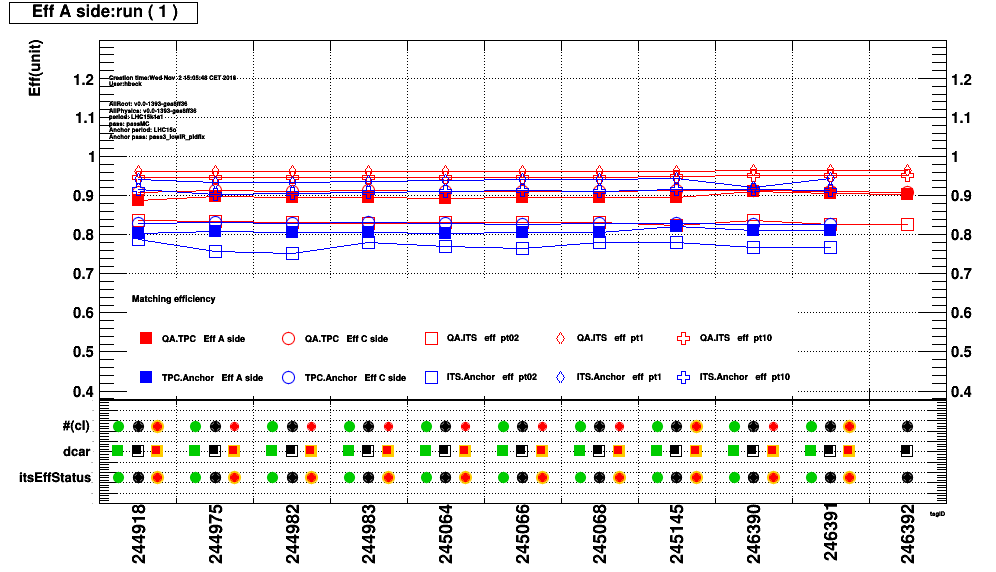

I-TCanvas::Print: png file matchingTPC-ITSEffe.png has been created


In [5]:
 { // matching efficiency
    trendingDraw->fWorkingCanvas->Clear(); 
    TLegend *legend = new TLegend(cRange5[0],cRange5[1],cRange5[2],cRange5[3],"Matching efficiency"); legend->SetBorderSize(0);
    legend->SetNColumns(5);
    graph = TStatToolkit::MakeMultGraph(treeMC,"","QA.TPC.tpcItsMatchA;QA.TPC.tpcItsMatchC;QA.ITS.EffTOTPt02;QA.ITS.EffTOTPt1;QA.ITS.EffTOTPt10;TPC.Anchor.tpcItsMatchA;TPC.Anchor.tpcItsMatchC;ITS.Anchor.EffTOTPt02;ITS.Anchor.EffTOTPt1;ITS.Anchor.EffTOTPt10:run","1","21;24;25;27;28;21;24;25;27;28","2;2;2;2;2;4;4;4;4;4",1,1.5,5,legend);
    TStatToolkit::DrawMultiGraph(graph,"alp");
    legend->Draw(); 
    trendingDraw->AppendStatusPad(0.3, 0.4, 0.05);
    trendingDraw->fWorkingCanvas->SaveAs("matchingTPC-ITSEffe.png");    
  }
trendingDraw->fWorkingCanvas->Draw();

# Conclusion
* ## Desperately needed semi-automatic, comprehensive MC - data validation at hand
* ## Quick-to-grasp representation of previously spread-out information
* ## Few lines of code ready to be included by each detector